In [3]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [315]:
bank = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
original_data = bank.copy()

In [354]:
bank.shape

(5000, 12)

In [318]:
# there are 5000 observations with 14 columns

In [319]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [321]:
# 0 : Not accepted loan, 1: accepted loan 
bank['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

4520 people didn't opted for a loan. 480 people opted for loan in the last campaign

In [322]:
bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [323]:
#checking for the null values
bank.isnull().any()
# bank.isnull().sum()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [325]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [326]:
# renaming column names having spaces between them
bank.rename(columns = {'ZIP Code':'Zip_Code', 'Personal Loan':'Personal_Loan', 'Securities Account':'Securities_Account', 'CD Account':'CD_Account'}, inplace = True)

In [327]:
bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'Zip_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

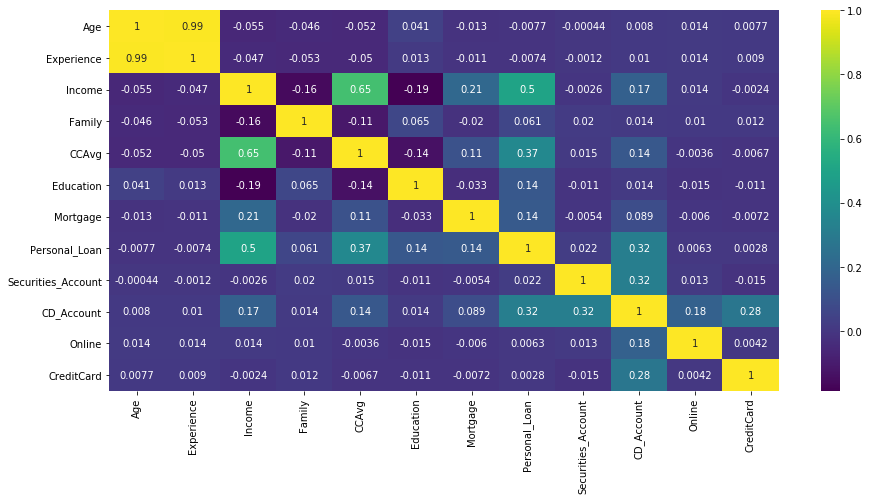

In [356]:
plt.figure(figsize=(15,7))
sns.heatmap(bank.corr(), annot=True, cmap = plt.cm.viridis)

We can observe that Experience and Income does not have much correlation with any other attributes

In [357]:
# lets see correlation w.r.t dependent variable - Personal_Loan 
bank.corr().loc['Personal_Loan']

Age                  -0.007726
Experience           -0.007413
Income                0.502462
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal_Loan         1.000000
Securities_Account    0.021954
CD_Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal_Loan, dtype: float64

From above we can see that 'Income', 'CCAvg', 'CD_Account' are more correlated to Personal_Loan, which makes them more important for tha dataset

In [360]:
# checking the variance of each attribute
bank.var()

Age                     131.404166
Experience              131.513962
Income                 2119.104235
Family                    1.317130
CCAvg                     3.054312
Education                 0.705380
Mortgage              10345.697538
Personal_Loan             0.086801
Securities_Account        0.093519
CD_Account                0.056763
Online                    0.240678
CreditCard                0.207606
dtype: float64

In [361]:
# checking multicollinearity using Variance Inflation Factor.

In [362]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(bank.values,i) for i in range(bank.shape[1])]
vif['Attirbutes']=bank.columns

In [363]:
vif

,VIF Factor,Attirbutes
0,84.664126,Age
1,31.734526,Experience
2,7.756030,Income
3,5.649978,Family
4,3.869238,CCAvg
5,7.119112,Education
6,1.376469,Mortgage
7,1.798275,Personal_Loan
8,1.276796,Securities_Account
9,1.538427,CD_Account


A rule of thumb commonly used in practise is if VIF is >10, you have high multicollinearity. Here Age and Experience are having high multicollinarity, hence we can consider removing one attribute. We will remove Age since it is having higest VIF score.

In [364]:
bank_vif = bank.drop(columns = {'Age'}, axis = 1)

In [365]:
bank_vif.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,49,4,1.6,1,0,0,1,0,0,0
1,19,34,3,1.5,1,0,0,1,0,0,0
2,15,11,1,1.0,1,0,0,0,0,0,0
3,9,100,1,2.7,2,0,0,0,0,0,0
4,8,45,4,1.0,2,0,0,0,0,0,1


In [366]:
# checking again for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(bank_vif.values,i) for i in range(bank_vif.shape[1])]
vif['Attributes']=bank_vif.columns

In [367]:
vif

,VIF Factor,Attributes
0,3.440337,Experience
1,6.230608,Income
2,4.104847,Family
3,3.838763,CCAvg
4,4.439694,Education
5,1.371102,Mortgage
6,1.610501,Personal_Loan
7,1.264433,Securities_Account
8,1.528203,CD_Account
9,2.428992,Online


As we can see from above dataframe there is no attribute with high Variance Inflation Factor. Removing Age column will not have any influence on the model however this will help to make our model computationally faster.

In [368]:
# Making dummy variables for Education
df_with_dummies = pd.get_dummies(bank_vif, prefix='Category_', columns=['Education'])

In [369]:
df_with_dummies.head()

,Experience,Income,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Category__1,Category__2,Category__3
0,1,49,4,1.6,0,0,1,0,0,0,1,0,0
1,19,34,3,1.5,0,0,1,0,0,0,1,0,0
2,15,11,1,1.0,0,0,0,0,0,0,1,0,0
3,9,100,1,2.7,0,0,0,0,0,0,0,1,0
4,8,45,4,1.0,0,0,0,0,0,1,0,1,0


In [370]:
# dropping 'Category_3' to prevent the model from dummy trap
df_with_dummies.drop(columns={'Category__3'}, inplace=True)

In [374]:
df_with_dummies.rename(columns = {'Category__1' : 'Undergraduate', 'Category__2' : 'Graduate'}, inplace = True)

In [375]:
df_with_dummies.columns

Index(['Experience', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Personal_Loan',
       'Securities_Account', 'CD_Account', 'Online', 'CreditCard',
       'Undergraduate', 'Graduate'],
      dtype='object')

### K-Nearest Neighbor

In [490]:
# splitting the data into training and testing set
from sklearn.model_selection import train_test_split
X = df_with_dummies.drop(columns = {'Personal_Loan'})
y = df_with_dummies['Personal_Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [491]:
# Checking the shape of training sets and testing sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 11)
(1500, 11)
(3500,)
(1500,)


In [492]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [493]:
# Fitting the model on training data
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [494]:
# Predicting on X_test
y_pred = knn_classifier.predict(X_test)

Text(0.5, 1, 'Confusion Matrix for KNN')

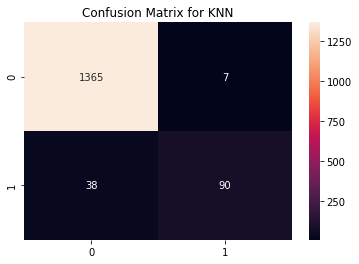

In [495]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'g')
plt.title("Confusion Matrix for KNN")

In [496]:
print("Accuracy score for KNN is: {0:.2f}".format(accuracy_score(y_test,y_pred)))

Accuracy score for KNN is: 0.97


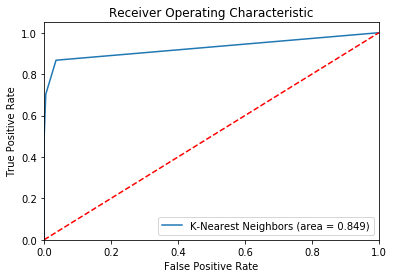

In [497]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

knn_roc_auc = roc_auc_score(y_test, knn_classifier.predict(X_test))
fpr2, tpr2, thresholds2 = roc_curve(y_test, knn_classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr2, tpr2, label='K-Nearest Neighbors (area = %0.3f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()